In [18]:
import tensorflow as tf
from tensorflow import keras

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
fashion = keras.datasets.fashion_mnist

(train_img, train_label), (test_img, test_label) = fashion.load_data()

4423680/4422102 [==============================] - 1s 0us/step


(28, 28)

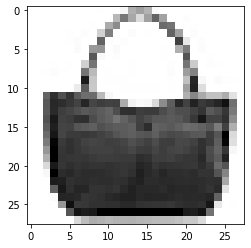

In [50]:
plt.imshow(train_img[100], cmap="Greys")
train_img[100].shape

In [17]:
train_img = train_img / 255.0
test_img = test_img / 255.0

In [71]:
w, h = 28, 28
train_img = train_img.reshape(train_img.shape[0], w, h, 1)
test_img = test_img.reshape(test_img.shape[0], w, h, 1)

In [76]:
model = keras.models.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=8, padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [77]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        262208    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_22 (Dense)             (None, 10)              

In [73]:
train_img.shape

(60000, 28, 28, 1)

In [78]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
model.fit(train_img, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 319s 170ms/step - loss: 0.3957
Epoch 2/5
1875/1875 [==============================] - 315s 168ms/step - loss: 0.2512
Epoch 3/5
1875/1875 [==============================] - 361s 192ms/step - loss: 0.2071
Epoch 4/5
  48/1875 [..............................] - ETA: 6:18 - loss: 0.1963

KeyboardInterrupt: 

In [75]:
model.evaluate(test_img, test_label)

313/313 [==============================] - 3s 11ms/step - loss: 0.2822


0.2822425961494446